# 局部线性嵌入LLE原理总结
&emsp;&emsp;局部线性嵌入(Locally Linear Embedding, 简称为LLE)也是非常重要的降维方法。和传统的PCA，LDA等关注样本方差的降维方法相比，LLE关注于降维时保持样本局部的线性特征，由于LLE在降维时保持了样本的局部特征，它广泛的用于图像图像识别，高维数据可视化等领域。下面，我先对LLE进行算法描述，然后从算法原理和代码实现两个方面对LLE进行总结。

## LLE算法描述
&emsp;&emsp;LLE 算法可以由下图所示的一个例子来描述。在下图中，LLE成功地将三维非线性数据映射到二维空间中（图B映射到图C）。如果把B中红颜色和蓝颜色的数据分别看成是分布在三维空间中的两类数据，则在通过LLE算法降维后，数据在二维空间中仍能保持相对独立的两类。观察第二行的几幅图，如果将B的黑色小圈中的数据映射到二维空间中，则为C中的黑色小圈中的数据。映射后的数据仍然能保持原有的数据流形，这说明LLE算法能够保持流形的领域不变性。LLE算法操作简单，且算法中的优化不涉及到局部最小化。该算法能解决非线性映射，但是，当处理数据的维数过大，数量过多，涉及到的稀疏矩阵过大，也不易于处理。观察第三行的几幅图，在图B的球形面中，当缺少北极面时，应用LLE算法则能很好的将其映射到二维空间中（如图C）。但如果数据分布在整个封闭的球面上，LLE则不能在保持原有的数据流形的情况下，将它们映射到二维空间中。所以我们在用LLE处理数据时，首先要假设数据不是分布在闭合的球面或者椭球面上。<br>

![image](lle_1.GIF)

## LLE算法原理
### LLE思想
&emsp;&emsp;首先我们先来看看LLE的算法思想。<br>
&emsp;&emsp;LLE首先假设数据在较小的局部是线性的，也就是说，某一个数据可以由它领域中的几个样本来线性表示。比如我们有一个样本$x_1$，我们在它的原始高维邻域里用K-近邻思想找到和它最近的三个样本$x_2,x_3,x_4$。然后我们假设$x_1$可以由$x_2,x_3,x_4$线性表示，即：<br>
$$x_1 = w_{12}x_2+w_{13}x_3+w_{14}x_4$$
&emsp;&emsp;其中$w_{12},w_{13},w_{14}$为权重系数。在我们通过LLE降维之后，我们希望$x_1$在低维空间对应的投影 $x_1^{'}$和$x_2,x_3,x_4$对应的投影$x_2^{'},x_3^{'},x_4^{'}$也尽量保持相同的线性关系，即<br>
$$x_1^{'} \approx w_{12}x_2^{'}+w_{13}x_3^{'}+w_{14}x_4^{'}$$
&emsp;&emsp;也就是说，投影前后线性关系的权重系数$w_{12},w_{13},w_{14}$是尽量不变或者最小改变的。<br>
&emsp;&emsp;从上面可以看出，线性关系只在样本的附近起作用，离样本远的样本对局部的线性关系没有影响，因此降维的复杂度降低了很多。<br>
&emsp;&emsp;下面我们推导LLE算法的过程。<br>
### LLE算法推导
&emsp;&emsp;对于LLE算法，我们首先要确定邻域大小的选择，即我们需要多少个邻域样本来线性表示某个样本。假设这个值为k。我们可以通过和KNN一样的思想通过距离度量比如欧式距离来选择某样本的k个最近邻。<br>
&emsp;&emsp;在寻找到某个样本的$x_i$的k个最近邻之后我们就需要找到$x_i$和这k个最近邻之间的线性关系，也就是要找到线性关系的权重系数。找线性关系，这显然是一个回归问题。假设我们有m个n维样本$\{x_1,x_2,x_3,\dots,x_m\}$，我们可以用均方差为回归问题的损失函数，即：<br>
$$ J(w)=\sum_{i=1}^m{\left \| x_i - \sum_{j=1}^k{w_{ij}x_j} \right \|_2^2}$$<br>
&emsp;&emsp;一般我们也会对权重系数$w_{ij}$做归一化的限制，即权重系数需要满足<br>
$$\sum_{j=1}^k{w_{ij}} = 1$$
&emsp;&emsp;对于不在样本$x_i$邻域内的样本$x_j$，我们令对应的$w_{ij} = 0$。<br>
&emsp;&emsp;也就是我们需要通过上面两个式子求出我们的权重系数。一般我们可以通过矩阵和拉格朗日乘子法来求解这个最优化问题。<br>
&emsp;&emsp;对于第一个式子，我们先将其矩阵化:<br>
$$
\begin{align*}
J(w)&=\sum_{i=1}^m{\left \| x_i - \sum_{j=1}^k{w_{ij}x_j} \right \|_2^2} \\
&= \sum_{i=1}^m{\left \| \sum_{j=1}^k{w_{ij}}x_i - \sum_{j=1}^k{w_{ij}x_j} \right \|_2^2}
\\ &= \sum_{i=1}^m{\left \| \sum_{j=1}^k{w_{ij}(x_i -x_j)} \right \|_2^2}
\\ &= \sum_{i=1}^m{\left \| {(x_i -x_j)W_i} \right \|_2^2}
\\ &= \sum_{i=1}^m{W_i^T(x_i-x_j)^T(x_i -x_j)W_i}
\end{align*} 
$$<br>
&emsp;&emsp;其中$W_i = (w_{i1},w_{i2},\dots,w_{ik})^T$。<br>
&emsp;&emsp;我们令矩阵$Z_i = (x_i-x_j)^T(x_i -x_j)$，则第一个式子进一步化简为：<br>
$$ J(w)= \sum_{i=1}^m{W_i^TZ_iW_i}$$
&emsp;&emsp;对于第二个式子，我们可以矩阵化为：<br>
$$\sum_{j=1}^k{w_{ij}} = W_i^T1_k = 1$$
&emsp;&emsp;其中$1_k$为k维全1向量。<br>
&emsp;&emsp;现在我们将矩阵化的两个式子用拉格朗日乘子法合为一个优化目标：
$$L(W)=\sum_{i=1}^m{W_i^TZ_iW_i}+\lambda (W_i^T1_k-1)$$
&emsp;&emsp;对$W$求导并令其值为0，我们得到
$$2Z_iW_i+\lambda 1_k = 0$$
&emsp;&emsp;即我们的
$$W_i=\lambda^{'}Z_i^{-1}1_k$$
&emsp;&emsp;其中$\lambda^{'} = -\frac{1}{2}\lambda$为一个常数。利用$ W_i^T1_k = 1$，对$W_i$归一化，那么最终我们的权重系数$W_i$为
$$W_i = \frac{Z_i^{-1}1_k}{1_k^TZ_i^{-1}1_k}$$
&emsp;&emsp;现在我们得到了高维度的权重系数，那么我们希望这些权重系数对应的线性关系在降维后一样得到保持。假设我们的n维样本集$\{x_1,x_2,\dots,x_m\}$，在低维度对应的投影为$\{y_1,y_2,\dots,y_m\}$，则我们希望保持线性关系，也就是希望对应的均方差损失函数最小，即最小化损失函数$J(Y)$，如下：
$$ J(y)=\sum_{i=1}^m{\left \| y_i - \sum_{j=1}^k{w_{ij}y_j} \right \|_2^2}$$<br>
&emsp;&emsp;可以看到这个式子和我们在高维的损失函数几乎相同，唯一的区别是高维的式子中，高维数据已知，目标是求最小值对应的权重系数$W$，而我们在低维是权重系数$W$已知，要求出对应的低维数据。
&emsp;&emsp;为了得到标准化的低维数据，一般我们也会加入如下的约束条件：
$$\sum_{i=1}^my_i=0;\frac{1}{m}\sum_{i=1}^my_iy_i^T=I$$
&emsp;&emsp;首先我们将目标函数矩阵化：
$$
\begin{align*}
J(w)&=\sum_{i=1}^m{\left \| y_i - \sum_{j=1}^k{w_{ij}y_j} \right \|_2^2} \\
&= \sum_{i=1}^m{\left \| YI_i-YW_i \right \|_2^2} \\ 
&= tr(Y^T(I-W)^T(I-W)Y)
\end{align*} 
$$<br>
&emsp;&emsp;如果我们令$M=(I-W)^T(I-W)$，则优化函数转变为最小化下式：
$$J(Y)=tr(Y^TMY)$$&emsp;&emsp;其中tr为迹函数。约束函数矩阵化为：$Y^TY=mI$。<br>
&emsp;&emsp;如果大家熟悉PCA的优化，就会发现这里的优化过程几乎一样。其实最小化J(Y)对应的Y就是M的最小的d个特征值所对应的d个特征向量组成的矩阵。当然我们也可以用拉格朗日乘子法得到这个：
$$L(Y)=tr(Y^TMY)+\lambda(Y^TY-mI)$$
&emsp;&emsp;对Y求导并令其为0，我们得到$2MY+2\lambda Y=0$，即$MY=\lambda Y$，这样我们就很清楚了，要得到最小的d维数据集，我们需要求出矩阵M最小的d个特征值所对应的d个特征向量组成的矩阵$Y=(y_1,y_2,\dots,y_d)$，即可。<br>
&emsp;&emsp;一般的，由于M的最小特征值为0不能反映数据特征，此时特征向量全为1。我们通常选择M的第二个到第d+1个最小的特征值对应的特征向量$M=(y_2,y_3,\dots,y_{d+1})$来得到最终的$Y$。为什么M的最小特征值为0呢？这是因为$W^Te = e$，得到$(W^T-I) e=0$。由于$e\not= 0$，所以只有$W^T-I=0$，即$(I-W)^T = 0$，两边同时右乘$I-W$，即可得到$(I-W)^T(I-W)e=0e$，即M的最小特征值为0。

### LLE算法流程
&emsp;&emsp;在上一节我们已经基本推导了LLE降维的整个过程，现在我们对算法过程做一个总结。整个LLE算法用一张图可以表示如下：<br>
![image](lle_2.png)
&emsp;&emsp;从图中可以看出，LLE算法主要分为3步，第一步是求K近邻的过程，这个过程使用了和KNN算法一样的求最近邻的方法。第二步，就是对每个样本求它在邻域里的K个近邻的线性关系，得到线性关系权重系数W。第三步就是利用权重系数来在低维里重构样本数据。<br>
&emsp;&emsp;具体过程如下：<br>
&emsp;&emsp;输入：样本集$D={x_1,x_2,\dots,x_m}$，最近邻数k，降维到的维数d
&emsp;&emsp;输出：低维样本集矩阵$D^{'}$
&emsp;&emsp;1. 枚举每一个样本$x_i$，按欧式距离作为度量，计算和$x_i$最近的k个最近邻$(x_{i1},x_{i2},\dots,x_{ik})$<br>
&emsp;&emsp;2. 枚举每一个样本$x_i$，求出局部协方差矩阵$Z_i=(x_i-x_j)^T(x_i-x_j)$，并求出对应的权重系数向量：
$$W_i = \frac{Z_i^{-1}1_k}{1_k^TZ_i^{-1}1_k}$$
<br>&emsp;&emsp;3. 由权重系数向量$W_i$组成权重系数矩阵$W_i$，计算矩阵$M=(I-W)^T(I-W)$<br>
&emsp;&emsp;4. 计算矩阵M的前d+1个特征值，并计算这d+1个特征值对应的特征向量$\{y_1,y_2,\dots,y_{d+1}\}$<br>
&emsp;&emsp;5. 由第二个特征向量到第d+1个特征向量张成的矩阵即为输出低维样本集矩阵$D^{'}=(y_2,y_3,\dots,y_{d+1})$<br>

## LLE程序实现
&emsp;&emsp;在scikit-learn中，sklearn.manifold包中有流形学习库。而该库就实现了LLE算法。
&emsp;&emsp;LLE算法类LocallyLinearEmbedding使用起来并不复杂，一般来说，需要调参的参数只有样本近邻的个数。下面我们对LocallyLinearEmbedding的主要参数做一个介绍。<br>
&emsp;&emsp;**n_neighbors:** 即我们搜索样本的近邻的个数，默认是5。 n_neighbors个数越大，则建立样本局部关系的时间会越大，也就意味着算法的复杂度会增加。当然n_neighbors个数越大，则降维后样本的局部关系会保持的更好。在下一节我们可以通过具体的例子看出这一点。一般来说，如果算法运行时间可以接受，我们可以尽量选择一个比较大一些的n_neighbors。<br>
&emsp;&emsp;**n_components:** 即我们降维到的维数。如果我们降维的目的是可视化，则一般可以选择2-5维。<br>
&emsp;&emsp;**reg:** 正则化系数，在n_neighbors大于n_components时，即近邻数大于降维的维数时，由于我们的样本权重矩阵不是满秩的，LLE通过正则化来解决这个问题。默认是0.001。一般不用管这个参数。当近邻数远远的大于降维到的维数时可以考虑适当增大这个参数。<br>
&emsp;&emsp;**eigen_solver:** 特征分解的方法。有‘arpack’和‘dense’两者算法选择。当然也可以选择‘auto‘让scikit-learn自己选择一个合适的算法。‘arpack’和‘dense’的主要区别是‘dense’一般适合于非稀疏的矩阵分解。而‘arpack’虽然可以适应稀疏和非稀疏的矩阵分解，但在稀疏矩阵分解时会有更好算法速度。当然由于它使用一些随机思想，所以它的解可能不稳定，一般需要多选几组随机种子来尝试。<br>
&emsp;&emsp;**method:** 即LLE的具体算法。LocallyLinearEmbedding支持4种不同的LLE算法。<br>
&emsp;&emsp;**neighbors_algorithm:** 这个是k近邻的搜索方法，和KNN算法的使用的搜索方法一样。<br><br>


&emsp;&emsp;下面我们用一个具体的例子来使用scikit-learn进行LLE降维并可视化。<br>
&emsp;&emsp;首先载入需要的库;<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import manifold, datasets
from sklearn.utils import check_random_state

&emsp;&emsp;接着生成随机数据，由于LLE必须要基于流形不能闭合，因此我们生成了一个缺一个口的三维球体。生成数据并可视化的代码如下：

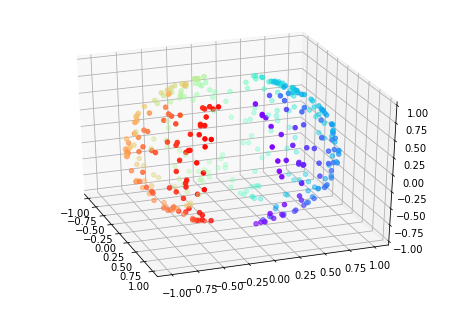

In [2]:
n_samples = 500
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# 让球体不闭合，符合流形定义
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]),     np.sin(t[indices]) * np.sin(p[indices]),     np.cos(t[indices])

fig = plt.figure()
ax = Axes3D(fig, elev=30, azim=-20)
ax.scatter(x, y, z, c=p[indices], marker='o', cmap=plt.cm.rainbow)

&emsp;&emsp;上图是原始数据的分布图。<br>
&emsp;&emsp;现在我们简单的尝试用LLE将其从三维降为2维并可视化，近邻数设为30，用标准的LLE算法。<br>

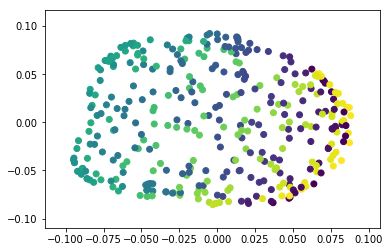

In [3]:
train_data = np.array([x, y, z]).T
trans_data = manifold.LocallyLinearEmbedding(n_neighbors =30, n_components = 2,
                                method='standard').fit_transform(train_data)
plt.scatter(trans_data[:, 0], trans_data[:, 1], marker='o', c=colors)

&emsp;&emsp;上图为降维到2维后的效果图。<br>
&emsp;&emsp;可以看出从三维降到二维后，我们大概还是可以看出这是一个球体。<br>

## LLE总结
&emsp;&emsp;LLE是广泛使用的图形图像降维方法，它实现简单，但是对数据的流形分布特征有严格的要求。比如不能是闭合流形，不能是稀疏的数据集，不能是分布不均匀的数据集等等，这限制了它的应用。下面总结下LLE算法的优缺点。<br>
&emsp;&emsp;LLE算法的主要优点有：<br>
&emsp;&emsp;1. 可以学习任意维的局部线性的低维流形<br>
&emsp;&emsp;2. 算法归结为稀疏矩阵特征分解，计算复杂度相对较小，实现容易。<br>
&emsp;&emsp;LLE算法的主要缺点有：<br>
&emsp;&emsp;1. 算法所学习的流形只能是不闭合的，且样本集是稠密均匀的。<br>
&emsp;&emsp;2. 算法对最近邻样本数的选择敏感，不同的最近邻数对最后的降维结果有很大影响。<br>


## 参考资料
1. [局部线性嵌入(LLE)原理总结](https://www.cnblogs.com/pinard/p/6266408.html?utm_source=itdadao&utm_medium=referral)
2. [Locally linear embedding (LLE)局部线性嵌入（降维）](http://blog.sina.com.cn/s/blog_6a1bf1310101habg.html)
3. [LocallyLinearEmbedding](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html)
4. [用scikit-learn研究局部线性嵌入(LLE)](http://www.mamicode.com/info-detail-1673555.html)